# Exploring data and machine learning

Welcome to the Exploring data and machine learning module of the Silver Stream of the Data Science Academy. In this exercise, you will go through the process of creating a machine learning model to predict the price of automobiles. You will be given a dataset which you must explore, clean, visualise, and perform the appropraite feature engineering and selection. At the end, you will apply the machine learning algorithm, and measure your predicted results against the actual values.

Import the packages needed for the practical

Import the **Automobile prices Training.csv** dataset.

Have a look at the first 10 rows of data to get a feel for it. 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.4,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.4,8.0,115,5500,18.0,22.0,17450
5,2.0,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136.0,mpfi,3.19,3.4,8.5,110,5500,19.0,25.0,15250
6,1.0,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136.0,mpfi,3.19,3.4,8.5,110,5500,19.0,25.0,17710
7,1.0,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136.0,mpfi,3.19,3.4,8.5,110,5500,19.0,25.0,18920
8,1.0,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131.0,mpfi,3.13,3.4,8.3,140,5500,17.0,20.0,23875
9,0.0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131.0,mpfi,3.13,3.4,7.0,160,5500,16.0,22.0,?


Have a look at the data types.

symboling            float64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg          float64
price                 object
dtype: object

We can see that some columns we expect to be numeric are given as objects. This is due to there being '?' in some of the unknown fields. In order to carry out a data science, we need the columns to be of the correct data types. Therefore, we will replace the '?' character with blanks for numeric columns, and with '' for object columns.

We have replaced the '?' with blanks. We will now be able to select the columns which need to be converted to a numeric data type, and change them. To do this, we introduce a new Pandas function, called **.to_numeric()**. An example of its application is given in the cell below.

In the cell above, the **errors** argument tells the function what to do when an error is encountered, that is, when a value cannot be parsed as a numeric type. The **coerce** parameter will change all errors to NaN's. Read the doc string for further details.

We could change all of the columns we want to be numeric, individually, using thhe above function, but that is poor practice. It is better to use the **.apply()** function to apply the **.to_numeric()** function to all of the appropraite columns in the dataframe in one line of code. First, we need to make a list of columns whose data types we want to change.

Then we use the **.apply()** function to te appropriate columns, as shown in the cell below.

We can now check the data types again.

symboling            float64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

We can see that the data types are now correct. All of the columns we expect to see as nunmeric are numeric.

We can now obtain the summary statistics for the dataframe, using the **.describe()** function.

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,196.000000,156.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,192.000000,192.000000,196.000000,194.000000,194.000000,196.000000,196.000000,192.000000
mean,0.831633,121.903846,98.730102,174.057143,65.917857,53.720408,2562.387755,127.372449,3.334479,3.250000,10.054133,104.948454,5125.257732,25.091837,30.658163,13373.848958
std,1.251551,35.351831,6.013597,12.377846,2.165756,2.446492,521.190474,42.160123,0.275240,0.322146,3.883134,40.051229,477.885222,6.585278,6.937116,8063.268233
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2163.000000,97.750000,3.150000,3.107500,8.500000,70.000000,4800.000000,19.000000,25.000000,7784.750000
50%,1.000000,115.000000,96.950000,173.200000,65.500000,54.100000,2422.500000,120.000000,3.310000,3.290000,9.000000,96.000000,5200.000000,24.000000,30.000000,10470.000000
75%,2.000000,150.000000,102.100000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.590000,3.410000,9.400000,119.000000,5500.000000,30.000000,34.000000,16525.750000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Visualising data in Python and handling nulls

Visualising data in Python is differnt in intent than visualisng data in Power BI. When using Power BI, for example, the report author is generally creating reports for business users and decision makers. These reports generally are built, incorporating the insights uncovered during the data analysis phase.

When creating visualisations in Python, the data analyst is usually trying to uncover the insights. The visualisations are meant to aid the analyst in selecting the appropriate columns in the dataset for machine learning, or to find correlations in the data. The visualisations shown in the next few cells will serve to demonstrate this idea.

The package we will be using is called Seaborn. This is built on top of Matplotlib, but with a lot of additional functionality. It is easy to use to generate powerful and insightful visualisations.

The first thing we want to do with any real dataset is to determine the existance of null values in the dataset. We do this by calling the Heatmap visual. The argument **fig = plt.figure(figsize=(10, 10))** is used to generate a visual of a decent size on the page. 

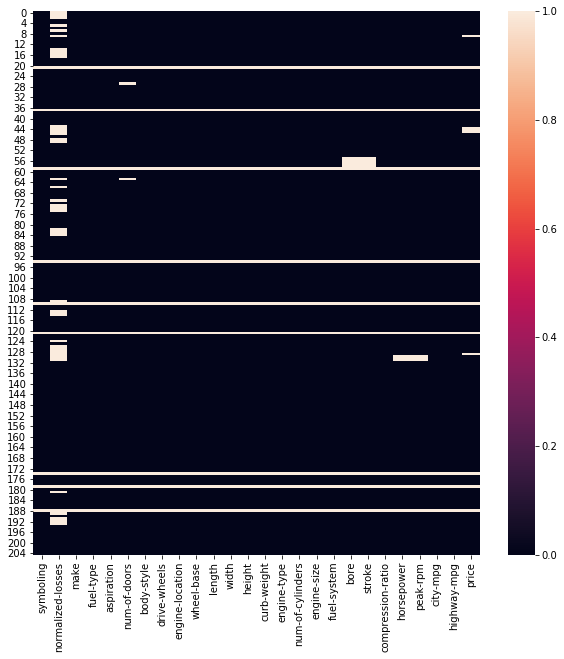

Everywhere the heatmap is black indicates a non-null value. The light coloured areas indicate nulls. The nulls are fairly sparse. With this in mind, we can decide how we want to deal with the nulls.

## Dealing with nulls

In this section, we want to look at some ways of dealing with null values. In some of the functions we called earlier, we simply dropped any rows with nulls in them. This is sometimes a reasonable approach, but, but you have a significant number of nulls, you may want to try fill these nulls with something else. Some approaches are to fill nulls with 0, or with the mean/median/mode of the column. If your data is ordered, you may want to forward/back fill values. The approach you use should be informed by knowledge you as the subject matter expert should have about the field.

In this section, we will look at filling nulls with the mean, forward filling as well as simply dropping nulls.

To get rid og the null values in the columns which contain nulls, we refer to the summary statistics of the dataframe to determine if it is viable to replace the nulls with another value, and if so, which one? We will look at the summary statistics of the dataframe, as well as a pairplot, to visualise the distributions of the values in the selected columns.

,horsepower,peak-rpm,bore,stroke,price
count,151.000000,151.000000,151.000000,151.000000,151.000000
mean,96.218543,5106.622517,3.307020,3.230199,11568.721854
std,30.744082,468.034026,0.270798,0.300405,5966.258463
min,48.000000,4150.000000,2.540000,2.070000,5118.000000
25%,69.000000,4800.000000,3.050000,3.080000,7429.000000
50%,90.000000,5200.000000,3.270000,3.270000,9258.000000
75%,114.000000,5500.000000,3.580000,3.410000,15275.000000
max,200.000000,6600.000000,3.940000,4.170000,35056.000000


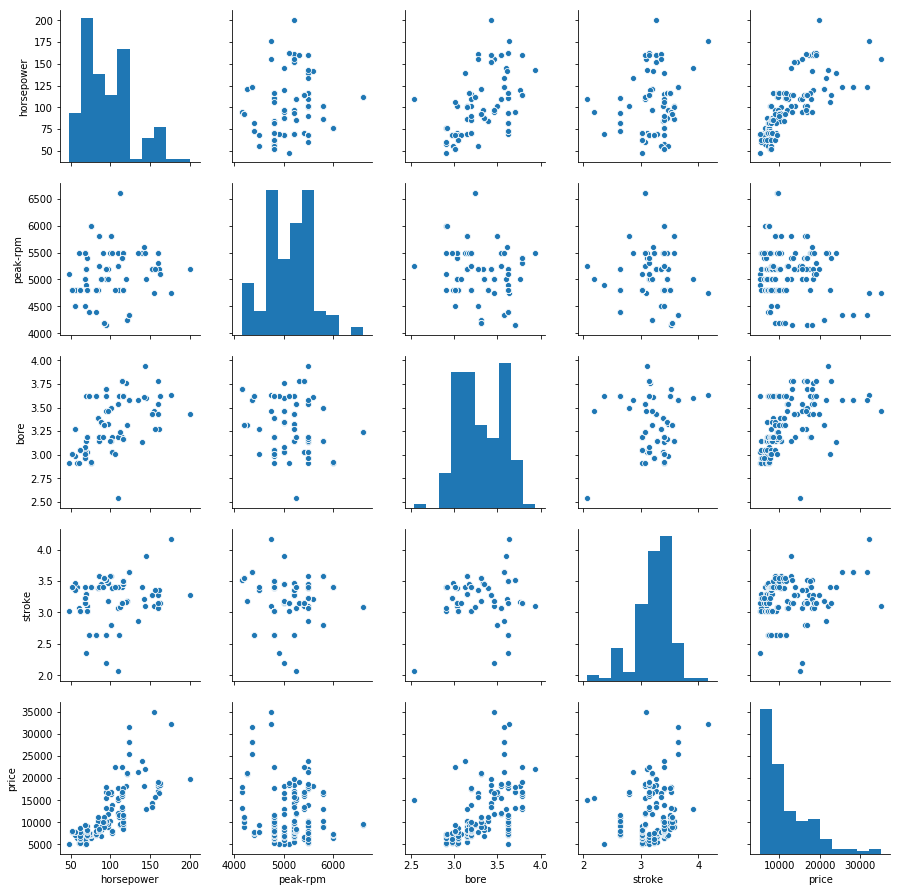

It appears as if the values for the **peak-rpm**, **bore** and **stroke** columns are normally distributed. It appears that the **horsepower** and **price** column values are skewed to the left. We will therefore replace the nulls in the **peak-rpm**, **bore** and **stroke** columns with their respective averages. 

For the imputation of the horsepower and the price, we will use a different method. As it appears that the price and the horsepower appear to vary linearly with respect to each other, we will sort the dataframe according tot the price, and then use the forward fill method on the horsepower, and then we will sort the dataframe according to horsepower, and then use the forward fill method on the price column.

Recall that the **symboling** and **normalized-losses** columns appeared to have no correlation with respect to price. Further, the **normalized-losses** column contained many null values. We will therefore drop these columns. After this, we will simply drop the remaining nulls.

We can now check the dataframe again to see if the nulls have all been dealt with.

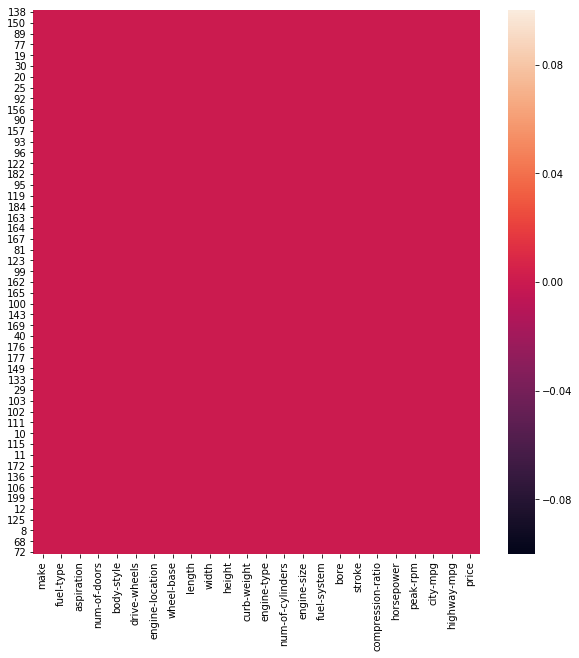

Since we want to predict the price of the automobiles, let us have a look at the distribution of the price column. Using the **.distplot()** function, with 20 bins, display a distribution plot of the price data. The distplot function does not work well with NaN values in the dataset, so for the purpose of plotting the function, you will have to drop the null values.

C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


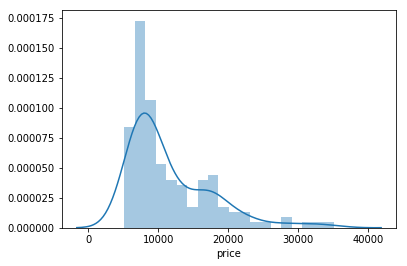

We may want to compare the price of the automobile against some other parameters. For example, sports cars, with higher horsepower outputs would tend to be more expensive than smaller city cars. Let's investigate. Use the **.jointplot()** function to determine the relationship between **price** and **horsepower**.

C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


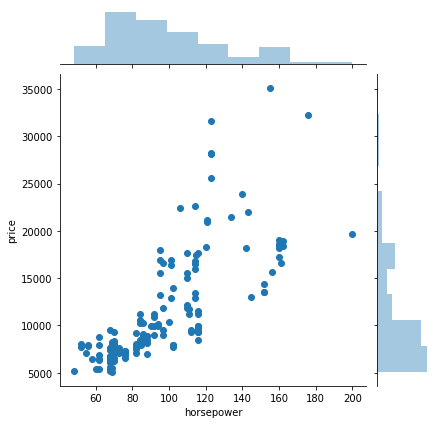

Our hypotheis seems to be correct. However, there are several other columns against which we can compare the price. It would be inefficient to try create multiple jointplots in the manner we have just done. Instead, we can use the PairGrid function.

In this visual, we want to compare price against all of the other numerical columns.

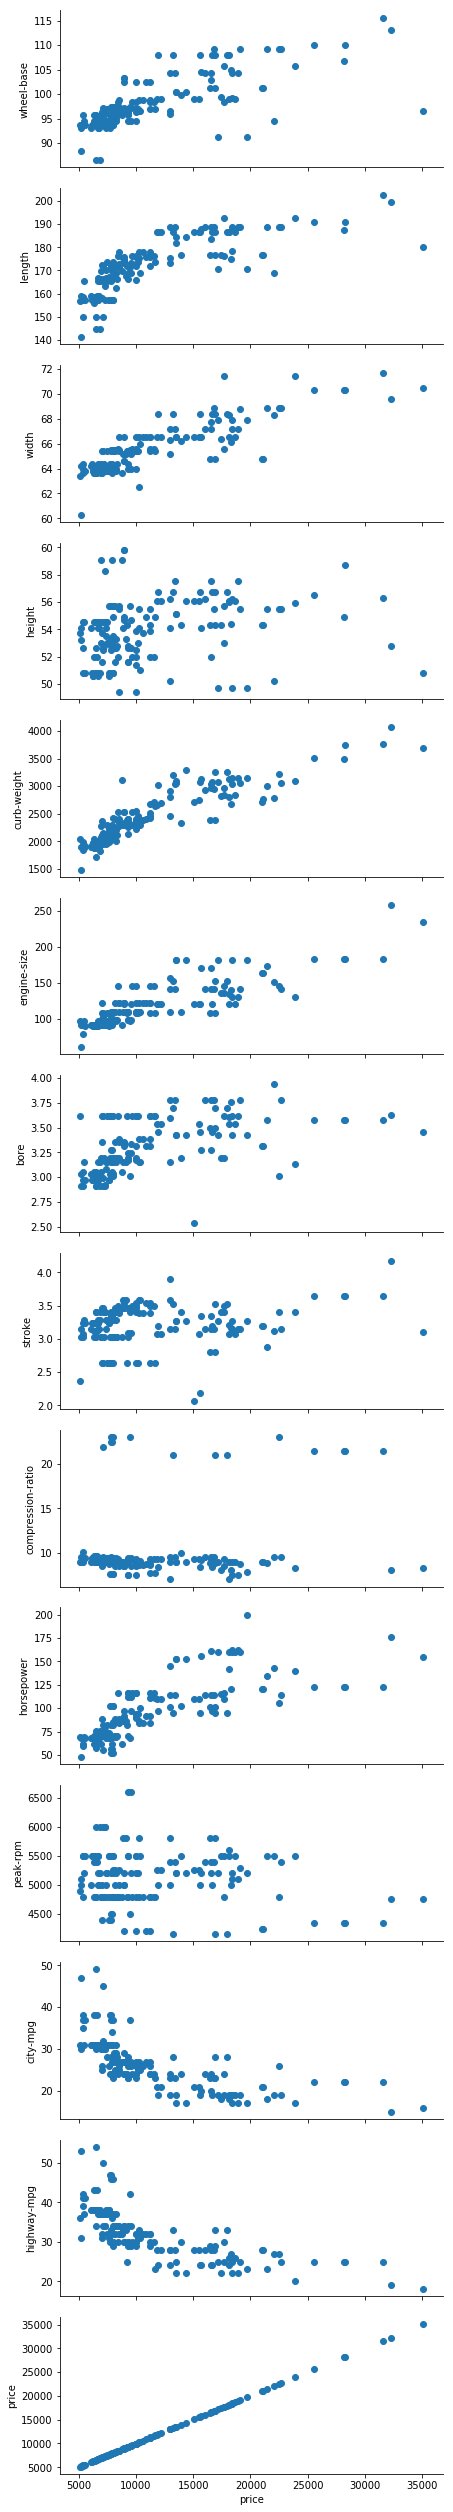

There are several numeric columns that seem to have a relationship with price. Length and wheel base seem to be positively correlated with price, while mpg (fuel economy) seems to have a negative correlation, although these correlations are not linear. In order to run a useful machine learning model, if we could modify the values in a column such that any correlations are linear, that would be beneficial. We can also see that symboling and normalized-losses seem to have no correlation whatsoever. We can get rid of these two columns, as they will add unnecessary noise into the machine learning model.

In order to linearise the price column, we will take the natural logarithm of this column. 

We can now run the same PairGrid again to see if the variation of price vs fuel consumption is now linear.

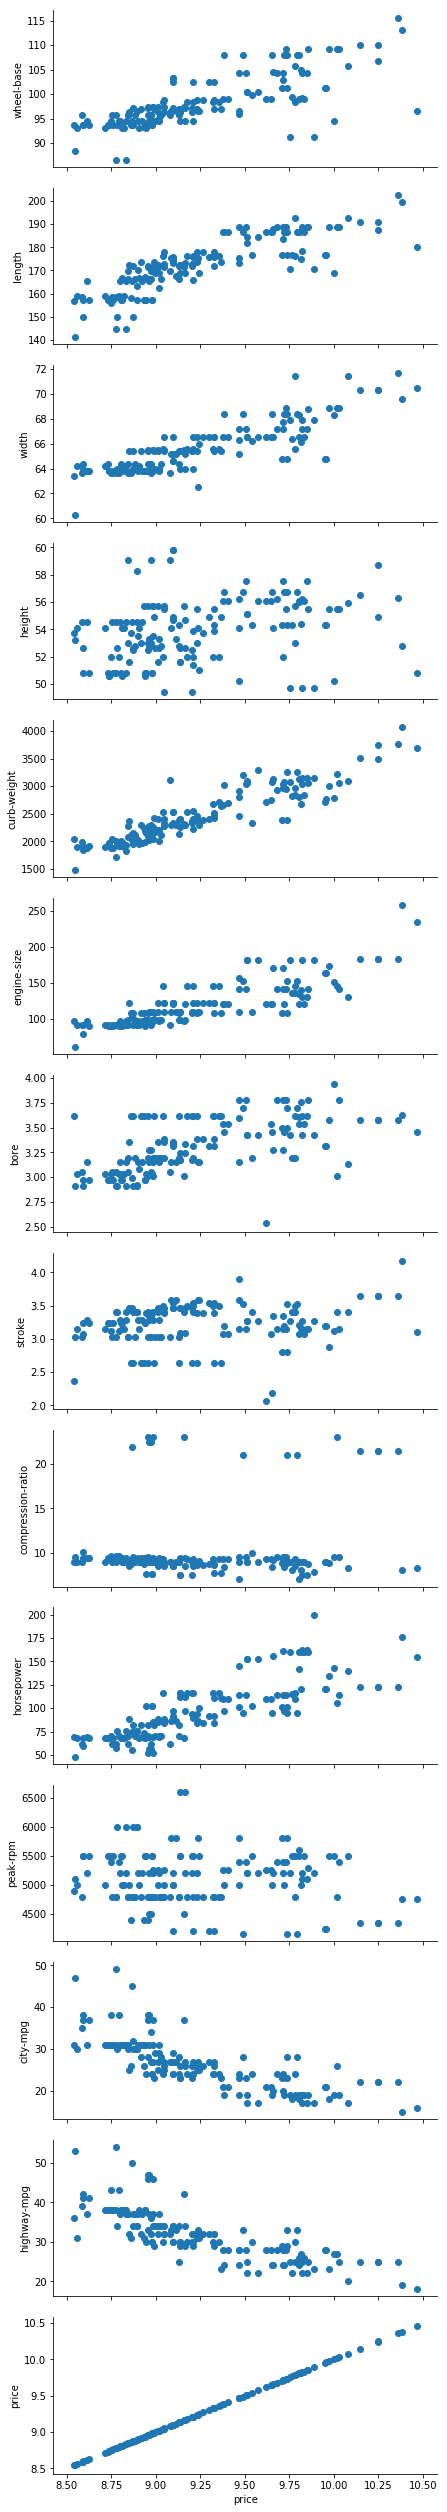

From these visuals, it appears that taking the natural logarithm of the price column seems to have increased the linearity of the price column when compared against the other columns in the dataset.

## Normalising data

The next concept to look at is normalising the data. To illustrate this concepte, we can plot **curb-weight** vs **width**

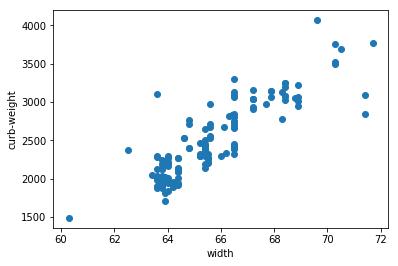

We can see that the magnitude of the width of the automobiles is in the 10s and the magnitude of the weight is in the 1000s. There is 2 orders of magnitude difference between these two features. Therefore, a machine learning algorithm will may infer that the curb-weight is a more important feature because its values are larger in magnitude than those of the width. 

We therefore want to normalise the data. This effectively means that we will be taking each column and setting its minimum value to be 0 and its maximum value to be 1. The values of the rest of the data will be scaled such that their distibution between the minimum and the maximum will remain the same as they were in the original column. The purpose of doing this is to ensure that all of the columns in the dataframe are approximately the same scale, such that a machine learning algorithm does not assign more importance to a column simply because its values are greater in magnitude. We want to exclude the price from the normalisation, as this is the target column for our machine learning.

In [27]:
# from sklearn import preprocessing

# numeric_cols = []
# for col in df.drop('price', axis = 1):
#     if df[col].dtype in ['float64', 'int64']:
#         x = df[[col]].values.astype(float)
#         min_max_scaler = preprocessing.MinMaxScaler()
#         x_scaled = min_max_scaler.fit_transform(x)
#         df[[col]] = x_scaled


We can now rerun the scatter plot to see if the values are in a similar scale.

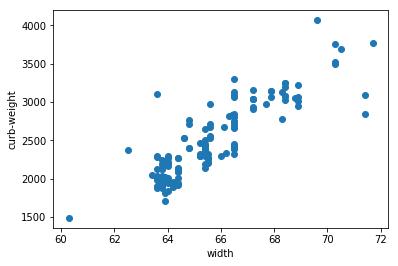

The shape of the plots both look the same, but you will notice that the scale of the values for the **width** and the **curb-weight** is similar.

Now that we have visualised and compared the **price** column to all of the numeric columns, we will do the same thing and compare the **price** column to the non-numeric columns, also using a PairGrid.

C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


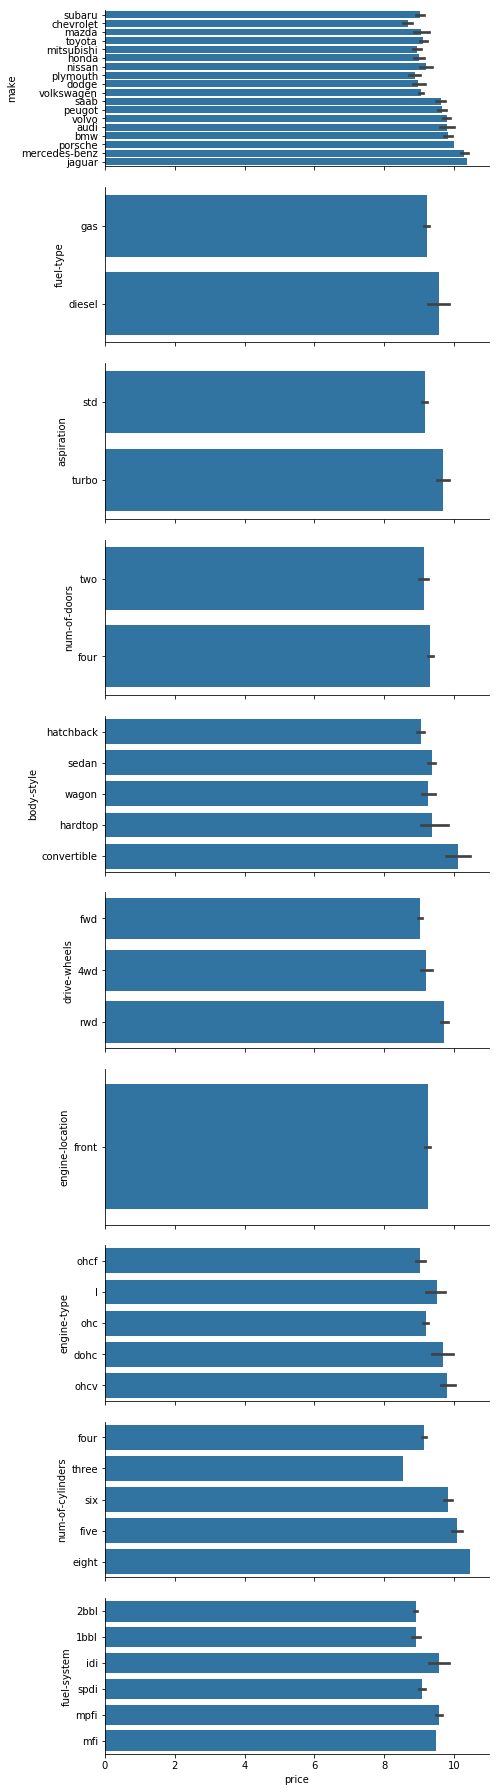

There are some clear relationships for the non-numeric columns and price. The number of cyclinders seems to have a strong relationship, as does the drive wheels, make and body type. You will also notice that the dataset contains the column **engine-location**, in which all of the values are the same. We can get rid of this column as it provides no meaningful data.

When dealing with data, ensuring the data types are corect is vitally important. If you consider the non-numerical data types, you will realise that they are actually categorical types. Therefore, we will convert the data in these columns to the categorical data type.

Check the data types to see if it is correct.

make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight           float64
engine-type          category
num-of-cylinders     category
engine-size           float64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg              float64
highway-mpg           float64
price                 float64
dtype: object

In [34]:
# df[categorical].describe()

## Machine Learning

Now that we have visualised and cleaned our data, and ensured that there are no nulls, we will apply a machine learning model to it to see if we can determine the price. We will be using the **scikit-learn** package to carry out the machine learning. As price is a continuous variable, this is an example of a regression problem; we would like to determine a particular value. Import the package we will require.

138    2.144822
18     2.145574
50     2.146569
150    2.149956
76     2.150845
         ...   
69     2.326909
68     2.327158
70     2.338040
47     2.340004
72     2.348008
Name: price, Length: 151, dtype: float64

We need to split the dataset into the feautres and labels. The features are all of the columns in the dataset, and the labels (or target), is the price column. 

We need to split the data into training and testing sets. We do this using the **train_test_split** package from scikit-learn.

The type of machine learning model we are using is the linear regression. The first thing we do is define the model.

Now we can try and fit the data to the model. We do this by using the **.fit()** function on the model.

ValueError: could not convert string to float: 'nissan'

## Feature encoding

We are getting an error in this case because we are trying to carry out machine learnig on text fields. This will not work. We need to figure out a way to represent all of the non-numeric columns as numerical values. This is called encoding. Let us get a list of categorical variables in our dataframe.

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system'],
      dtype='object')

There are two columns, namely **num-of-cylinders** and **num-of-doors** which contain number values, but written out as strings (**'two'**, instead of **'2'**). For these columns, we will create a dictionary in which we map each numeric value to its corresponding string representation. These columns represent **ordinal categorical** data. There is an inherent order to them. 

With this mapping, we will now create a dictionary of dictionaries; the keys to this dictionary will be the names of the two columns in our dataframe which contain the ordinal data. To make the nested dictionary easier to work with, we will create a dataframe and work with that instead.

As we will be using this dictionary later when we make predictions on unseen data, we want to save the dictionary to disk. Therefore, we write it to disk, and set the **index = False** parameter.

We will now loop through the automobiles dataframe, and for each column in the dataframe whose column header matches a key in the **num_df** nested dictionary, we will replace the values in that dataframe column with those in the dictionary. 

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
138,subaru,gas,std,2,hatchback,fwd,93.7,156.9,63.4,53.7,...,97.0,2bbl,3.62,2.36,9.0,69.0,4900.0,31.0,36.0,8.540519
18,chevrolet,gas,std,2,hatchback,fwd,88.4,141.1,60.3,53.2,...,61.0,2bbl,2.91,3.03,9.5,48.0,5100.0,47.0,53.0,8.546946
50,mazda,gas,std,2,hatchback,fwd,93.1,159.1,64.2,54.1,...,91.0,2bbl,3.03,3.15,9.0,68.0,5000.0,30.0,31.0,8.555452
150,toyota,gas,std,2,hatchback,fwd,95.7,158.7,63.6,54.5,...,92.0,2bbl,3.05,3.03,9.0,62.0,4800.0,35.0,39.0,8.584478
76,mitsubishi,gas,std,2,hatchback,fwd,93.7,157.3,64.4,50.8,...,92.0,2bbl,2.97,3.23,9.4,68.0,5500.0,37.0,41.0,8.592115
32,honda,gas,std,2,hatchback,fwd,93.7,150.0,64.0,52.6,...,79.0,1bbl,2.91,3.07,10.1,60.0,5500.0,38.0,42.0,8.593969
89,nissan,gas,std,2,sedan,fwd,94.5,165.3,63.8,54.5,...,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,8.612322
118,plymouth,gas,std,2,hatchback,fwd,93.7,157.3,63.8,50.8,...,90.0,2bbl,2.97,3.23,9.4,68.0,5500.0,37.0,41.0,8.625509
51,mazda,gas,std,2,hatchback,fwd,93.1,159.1,64.2,54.1,...,91.0,2bbl,3.03,3.15,9.0,68.0,5000.0,31.0,38.0,8.715224
77,mitsubishi,gas,std,2,hatchback,fwd,93.7,157.3,64.4,50.8,...,92.0,2bbl,2.97,3.23,9.4,68.0,5500.0,31.0,38.0,8.730529


For the remaining categorical columns, we will use the built-in Pandas function for categorical data encoding, **.cat.codes**. But first, we want to create a dictionary of these category encodings, such that we can use the exact same category encodings for our validation set.

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-type', 'fuel-system'],
      dtype='object')

{'make': {0: 'audi', 1: 'bmw', 2: 'chevrolet', 3: 'dodge', 4: 'honda', 5: 'jaguar', 6: 'mazda', 7: 'mercedes-benz', 8: 'mitsubishi', 9: 'nissan', 10: 'peugot', 11: 'plymouth', 12: 'porsche', 13: 'saab', 14: 'subaru', 15: 'toyota', 16: 'volkswagen', 17: 'volvo'}, 'fuel-type': {0: 'diesel', 1: 'gas'}, 'aspiration': {0: 'std', 1: 'turbo'}, 'body-style': {0: 'convertible', 1: 'hardtop', 2: 'hatchback', 3: 'sedan', 4: 'wagon'}, 'drive-wheels': {0: '4wd', 1: 'fwd', 2: 'rwd'}, 'engine-type': {0: 'dohc', 1: 'l', 2: 'ohc', 3: 'ohcf', 4: 'ohcv'}, 'fuel-system': {0: '1bbl', 1: '2bbl', 2: 'idi', 3: 'mfi', 4: 'mpfi', 5: 'spdi'}}


We want to retain these encodings, because, when we run the prediction on previously unseen data, we will need to use these encodings to encode the validation set in the same way as we have done for the training set.

Now, we will change the values in the dataframe to their encoded values. 

We will now take the newly encoded dataframe and use this to create our training and testing sets.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We see now that the data is able to be fitted to the data, as all of the fields are numeric.

In the cell below, we will use the model to make a prediction against our test set. We save the result as **pred**.

## Model evaluation

In order to test the usefulness of our model, we need to evaluate it. There are several functions within scikit-learn that we can use to test various different machine learning models. In this case, we are interested in metrics which measure regression algorithms. 

More information can be found at:
https://scikit-learn.org/stable/modules/model_evaluation.html

The mean absolute error (MAE) is the mean of all of the errors. The **error** is defined as the difference between the predicted value and the actual value. The smaller, the better.

The mean squared error (MSE) is the mean of the squares of all the errors. This means you take the difference between the predicted value and the actual value, and you square the result; this is called the **squared error**. You then take the mean of these squared errors. The point of doing this is that, if there are a some of predicted values which differ significantly from the actual values, these errors will be penalised more than errors which are smaller. You could take the square root of this value to obtain an error which is in the same units as the target column. The smaller, the better.

The R-Squared value is a measure of how well the regression line fits the data. The larger, the better, with a maximum value of 1.

Recall, when we were preparing the data for machine learning, we discovered that the price varies non-linearly with respect to several other features, and we therefore made predicitions against the log(price). The reverse operation for a logarithm is the exponential, so to obtain a true reflection of how well our model predicts, we will take the exponential of the prediction and actual values and pass these into metrics functions.

Mean Absolute Error =  1462.25
Mean Squared Error =  2033.85
R-Squared Value =  0.901


To gain an understanding of how each of the features contribute to the prediction of the model, we can call the **model.coef_** function. This gives us the coefficients of the linear equation. The higher magnitude coefficients have a greater impact on the predictions.

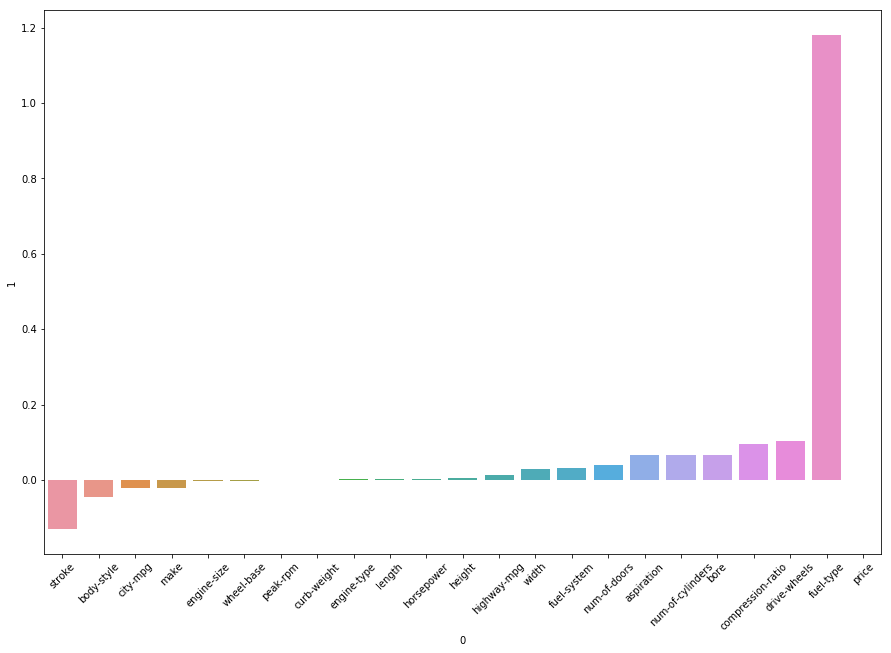

In the following cell, we will create a dataframe which shows the testing dataset together with the predicted results, such that we can see the difference for individual rows in the data. 

In order to do this, we need to reset the indices for the x_test and y_test dataframes, and concatinate them.

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,prediction,diff
0,8,1,1,4,3,1,96.3,172.4,65.4,51.6,...,3.17,3.46,7.5,116.0,5500.0,23.0,30.0,9279.0,10803.274220,-1524.274220
1,2,1,0,4,3,1,94.5,158.8,63.6,52.0,...,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,6575.0,7362.388848,-787.388848
2,15,1,0,2,1,2,98.4,176.2,65.6,52.0,...,3.62,3.50,9.3,116.0,4800.0,24.0,30.0,9639.0,11349.843104,-1710.843104
3,9,1,0,4,3,1,97.2,173.4,65.2,54.7,...,3.33,3.47,8.5,97.0,5200.0,27.0,34.0,9549.0,8400.665469,1148.334531
4,17,1,1,4,3,2,109.1,188.8,68.9,55.5,...,3.78,3.15,9.5,114.0,5400.0,19.0,25.0,22625.0,18666.571443,3958.428557
5,14,1,0,4,3,1,97.2,172.0,65.4,52.5,...,3.62,2.64,9.5,82.0,4800.0,32.0,37.0,7126.0,8239.361217,-1113.361217
6,15,1,0,2,3,2,94.5,168.7,64.0,52.6,...,3.24,3.08,9.4,112.0,6600.0,26.0,29.0,9298.0,8778.225975,519.774025
7,16,1,0,4,3,1,97.3,171.7,65.5,55.7,...,3.19,3.40,9.0,85.0,5250.0,27.0,34.0,8495.0,8377.670515,117.329485
8,9,1,0,4,4,1,94.5,170.2,63.8,53.5,...,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,7999.0,7006.096819,992.903181
9,16,1,0,2,2,1,94.5,165.7,64.0,51.4,...,3.19,3.40,8.5,90.0,5500.0,24.0,29.0,9980.0,6988.507548,2991.492452


## Preserving a machine learning model

Now that we have create a machine learning model that appears to predict with a fair degree of reliability, we can save the model. In practice, we do not want to have retrain the model each time we use it. We would like to train the model once, and save that model for later consumption. Therefore, we will be using the **pickle** package to preserve the model. We will then save the preserved model (which is a **bytes** object) as a list, this list will be saved as a dataframe, and this dataframe will then be written to disk.

In [57]:
import pandas as pd
import pickle
from io import StringIO
from io import BytesIO
import codecs

In [58]:
pickle_df = pickle.dumps(model)
pickle_df_list = list(pickle_df)
pickle_df = pd.DataFrame(pickle_df_list, columns = ['a'])
pickle_df.to_csv('pickle.csv')